In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('datagempa2_new.csv', names = ['Date','Time','Latitude','Longitude','Depth','Magnitude'])
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,12/12/2021,14:04:36,-8.55,121.91842,10.0,3.34
1,12/14/2021,23:50:01,-7.53,121.58232,10.0,3.11
2,12/14/2021,23:42:19,-7.36,121.23427,15.0,2.58
3,12/14/2021,23:32:43,-8.02,122.40597,10.0,3.41
4,12/14/2021,23:29:36,-7.51,121.63541,10.0,2.64


In [23]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude'], dtype='object')

In [24]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,12/12/2021,14:04:36,-8.55,121.91842,10.0,3.34
1,12/14/2021,23:50:01,-7.53,121.58232,10.0,3.11
2,12/14/2021,23:42:19,-7.36,121.23427,15.0,2.58
3,12/14/2021,23:32:43,-8.02,122.40597,10.0,3.41
4,12/14/2021,23:29:36,-7.51,121.63541,10.0,2.64


In [25]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')

In [26]:
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values

In [27]:
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,-8.55,121.91842,10.0,3.34,1.639318e+09
1,-7.53,121.58232,10.0,3.11,1.639526e+09
2,-7.36,121.23427,15.0,2.58,1.639525e+09
3,-8.02,122.40597,10.0,3.41,1.639525e+09
4,-7.51,121.63541,10.0,2.64,1.639525e+09


In [28]:
#!pip install basemap
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

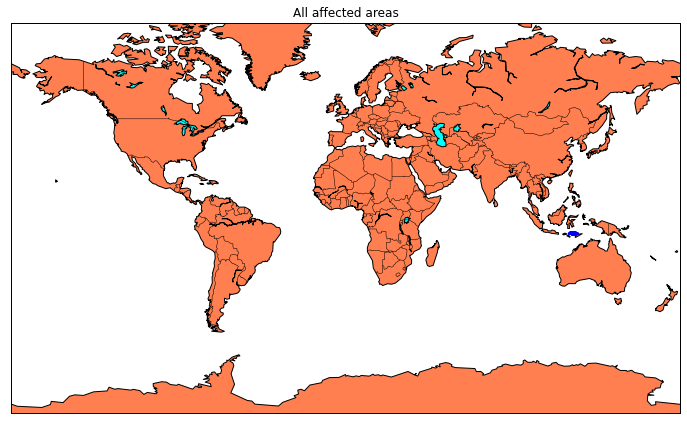

In [29]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [30]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

In [31]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(268, 3) (67, 3) (268, 2) (67, 3)


In [32]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

array([[ 3.1932, 13.355 ],
       [ 2.5717, 59.046 ],
       [ 3.0113, 51.997 ],
       [ 3.1467, 28.055 ],
       [ 3.2331, 10.483 ],
       [ 3.0688, 10.766 ],
       [ 3.2922, 17.103 ],
       [ 2.4355, 38.884 ],
       [ 2.8952, 12.715 ],
       [ 3.213 , 26.483 ],
       [ 3.3379, 13.529 ],
       [ 3.0223, 12.111 ],
       [ 3.0134, 27.283 ],
       [ 3.1143, 15.003 ],
       [ 3.8075, 10.873 ],
       [ 3.2859, 33.454 ],
       [ 3.078 , 19.71  ],
       [ 3.0146, 17.058 ],
       [ 3.3155, 15.961 ],
       [ 2.9692, 15.215 ],
       [ 3.3454, 19.254 ],
       [ 3.3652, 14.11  ],
       [ 3.6449, 19.518 ],
       [ 2.6941, 17.592 ],
       [ 3.1058, 16.856 ],
       [ 3.6452, 12.868 ],
       [ 2.5574, 49.058 ],
       [ 3.2833, 20.555 ],
       [ 3.4917, 17.444 ],
       [ 3.2656, 18.469 ],
       [ 3.8506, 12.878 ],
       [ 3.1666, 14.816 ],
       [ 3.17  , 10.672 ],
       [ 3.1253, 16.273 ],
       [ 3.0093, 13.347 ],
       [ 2.7124, 42.393 ],
       [ 3.4439, 16.01  ],
 

In [33]:
reg.score(X_test, y_test)

0.24522034608248605

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}

grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

array([[ 3.1932, 13.355 ],
       [ 2.5717, 59.046 ],
       [ 3.0113, 51.997 ],
       [ 3.1467, 28.055 ],
       [ 3.2331, 10.483 ],
       [ 3.0688, 10.766 ],
       [ 3.2922, 17.103 ],
       [ 2.4355, 38.884 ],
       [ 2.8952, 12.715 ],
       [ 3.213 , 26.483 ],
       [ 3.3379, 13.529 ],
       [ 3.0223, 12.111 ],
       [ 3.0134, 27.283 ],
       [ 3.1143, 15.003 ],
       [ 3.8075, 10.873 ],
       [ 3.2859, 33.454 ],
       [ 3.078 , 19.71  ],
       [ 3.0146, 17.058 ],
       [ 3.3155, 15.961 ],
       [ 2.9692, 15.215 ],
       [ 3.3454, 19.254 ],
       [ 3.3652, 14.11  ],
       [ 3.6449, 19.518 ],
       [ 2.6941, 17.592 ],
       [ 3.1058, 16.856 ],
       [ 3.6452, 12.868 ],
       [ 2.5574, 49.058 ],
       [ 3.2833, 20.555 ],
       [ 3.4917, 17.444 ],
       [ 3.2656, 18.469 ],
       [ 3.8506, 12.878 ],
       [ 3.1666, 14.816 ],
       [ 3.17  , 10.672 ],
       [ 3.1253, 16.273 ],
       [ 3.0093, 13.347 ],
       [ 2.7124, 42.393 ],
       [ 3.4439, 16.01  ],
 

In [35]:
best_fit.score(X_test, y_test)

0.24522034608248605

In [36]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [37]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)

# neurons = [16, 64, 128, 256]
neurons = [16]
# batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = ['SGD', 'Adadelta']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [39]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.600000 using {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.200000 (0.400000) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.600000 (0.489898) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.400000 (0.489898) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.600000 (0.489898) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}


In [40]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

In [41]:
model.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
27/27 [==============================] - 1s 10ms/step - loss: 0.5000 - accuracy: 1.0000 - val_loss: 0.5000 - val_accuracy: 1.0000
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 1.0000 - val_loss: 0.5000 - val_accuracy: 1.0000
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 1.0000 - val_loss: 0.5000 - val_accuracy: 1.0000
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 1.0000 - val_loss: 0.5000 - val_accuracy: 1.0000
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 1.0000 - val_loss: 0.5000 - val_accuracy: 1.0000
Epoch 6/20
27/27 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 1.0000 - val_loss: 0.5000 - val_accuracy: 1.0000
Epoch 7/20
27/27 [==============================] - 0s 3ms/step - loss: 0.5000 - accuracy: 1.0000 - val_loss: 0.5000 - val_accuracy: 1.0000
Epoch 8/20
27/27 [=

In [42]:
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

3/3 [==============================] - 0s 5ms/step - loss: 0.5000 - accuracy: 1.0000
Evaluation result on Test Data : Loss = 0.5, accuracy = 1.0


In [43]:
model.save('earthquake.h5')